In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame,Panel
import time
from datetime import datetime
import os
import matplotlib
import statsmodels.api as sm
import quandl

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_rows', None)

In [3]:
LEI = quandl.get("FRED/USSLIND", authtoken="NvCE6q3qTHbJz2XBoasT")

In [4]:
LEI.columns = ['LEI']

In [5]:
LEI['LEI_diff'] = LEI['LEI'].diff(1).fillna(0)
LEI['LEI_double_diff'] = LEI['LEI_diff'].diff(1).fillna(0)

In [6]:
LEI['Expansion'] = (LEI['LEI'] >= 0) & (LEI['LEI_diff'] >= 0)
LEI['Slowdown'] = (LEI['LEI'] >= 0) & (LEI['LEI_diff'] < 0)
LEI['Recovery'] = (LEI['LEI'] < 0) & (LEI['LEI_diff'] >= 0)
LEI['Contraction'] =(LEI['LEI'] < 0) & (LEI['LEI_diff'] < 0)

In [7]:
LEI

,LEI,LEI_diff,LEI_double_diff,Expansion,Slowdown,Recovery,Contraction
Date,,,,,,,
1982-01-01,-0.95,0.00,0.00,False,False,True,False
1982-02-01,-0.44,0.51,0.51,False,False,True,False
1982-03-01,-0.21,0.23,-0.28,False,False,True,False
1982-04-01,-0.17,0.04,-0.19,False,False,True,False
1982-05-01,-0.11,0.06,0.02,False,False,True,False
1982-06-01,-0.12,-0.01,-0.07,False,False,False,True
1982-07-01,-0.15,-0.03,-0.02,False,False,False,True
1982-08-01,-0.31,-0.16,-0.13,False,False,False,True
1982-09-01,-0.30,0.01,0.17,False,False,True,False


In [8]:
LEI

,LEI,LEI_diff,LEI_double_diff,Expansion,Slowdown,Recovery,Contraction
Date,,,,,,,
1982-01-01,-0.95,0.00,0.00,False,False,True,False
1982-02-01,-0.44,0.51,0.51,False,False,True,False
1982-03-01,-0.21,0.23,-0.28,False,False,True,False
1982-04-01,-0.17,0.04,-0.19,False,False,True,False
1982-05-01,-0.11,0.06,0.02,False,False,True,False
1982-06-01,-0.12,-0.01,-0.07,False,False,False,True
1982-07-01,-0.15,-0.03,-0.02,False,False,False,True
1982-08-01,-0.31,-0.16,-0.13,False,False,False,True
1982-09-01,-0.30,0.01,0.17,False,False,True,False


In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,minmax_scale

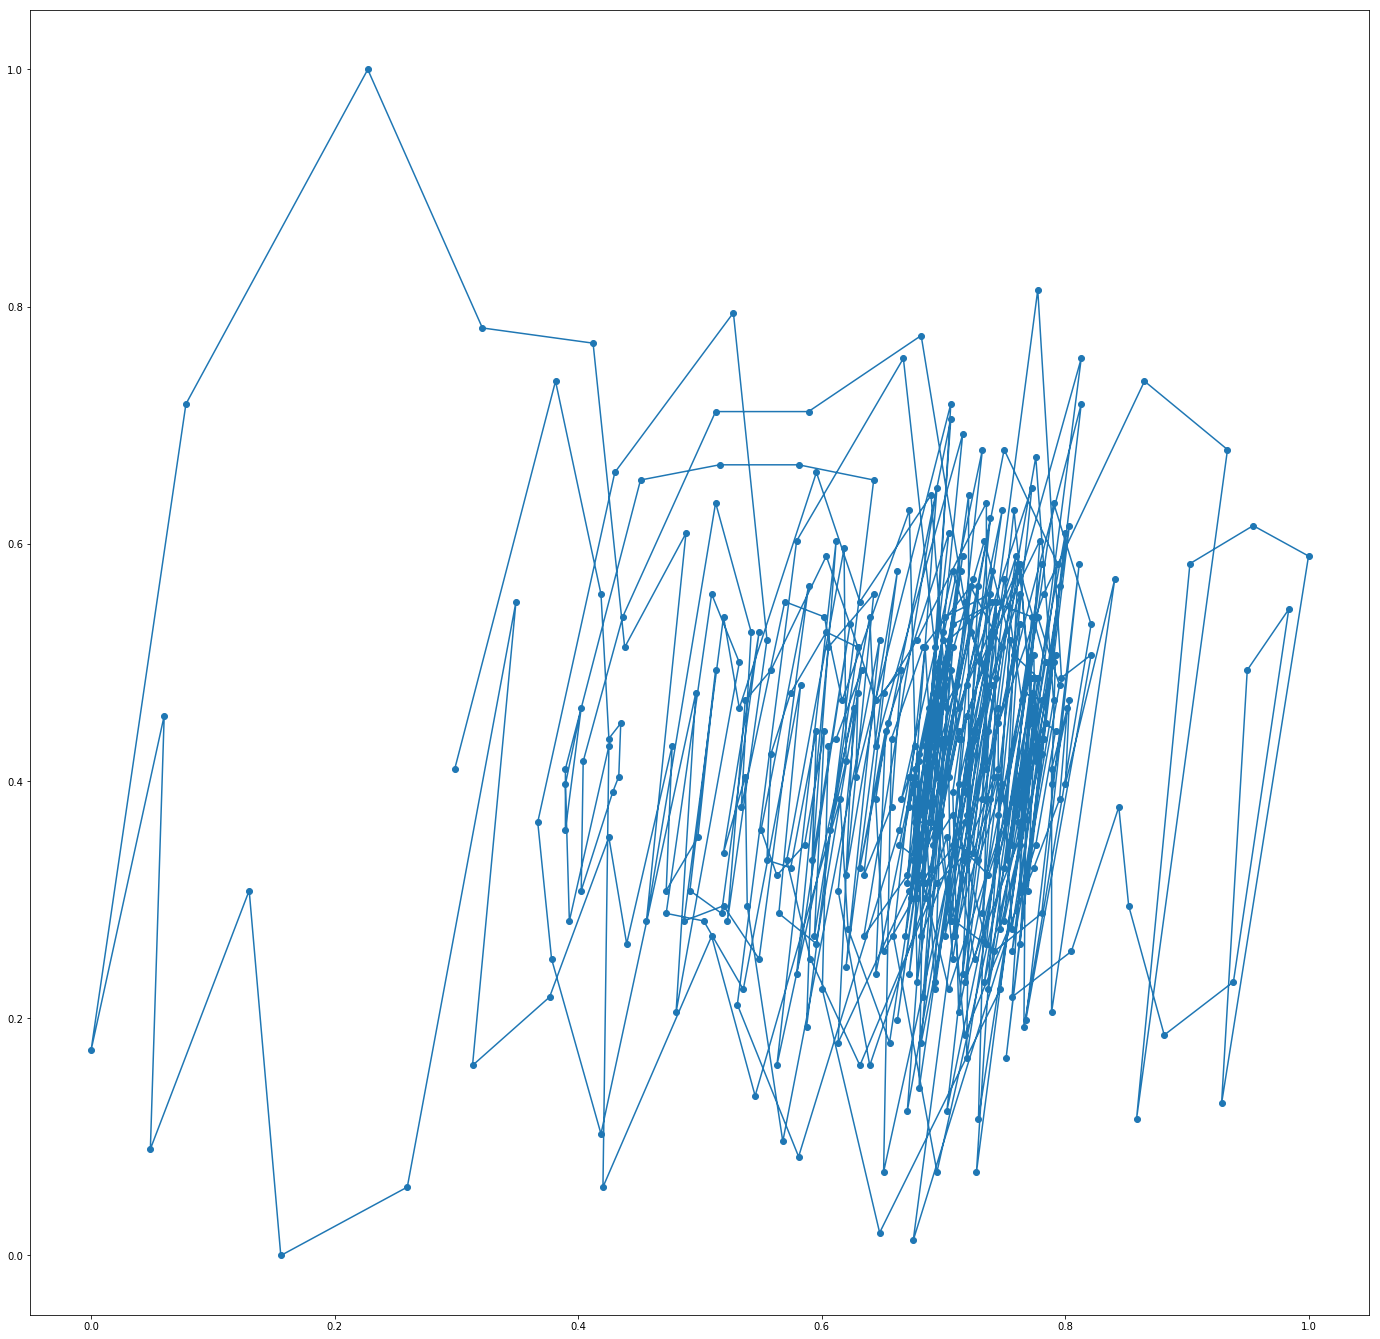

In [10]:
plt.close()
plt.figure(figsize = (24,24))
plt.plot(minmax_scale(LEI['LEI']),minmax_scale(LEI['LEI_diff']),'-o')
plt.show()

In [11]:
LEI

,LEI,LEI_diff,LEI_double_diff,Expansion,Slowdown,Recovery,Contraction
Date,,,,,,,
1982-01-01,-0.95,0.00,0.00,False,False,True,False
1982-02-01,-0.44,0.51,0.51,False,False,True,False
1982-03-01,-0.21,0.23,-0.28,False,False,True,False
1982-04-01,-0.17,0.04,-0.19,False,False,True,False
1982-05-01,-0.11,0.06,0.02,False,False,True,False
1982-06-01,-0.12,-0.01,-0.07,False,False,False,True
1982-07-01,-0.15,-0.03,-0.02,False,False,False,True
1982-08-01,-0.31,-0.16,-0.13,False,False,False,True
1982-09-01,-0.30,0.01,0.17,False,False,True,False


In [12]:
X = pd.read_csv('econ_var.csv',index_col=0)

In [13]:
X

,Inflation,PMI,Average_Weekly_Hours,M2_diff,Ten_yr_Spread,Building_Permit,Nonfarm_Payroll,Initial_Claims
Date,,,,,,,,
1980-01,13.294,-12.3,46.2,0.006107,-3.02,1280.0,90802.0,428000.0
1980-02,13.909,-8.0,50.2,0.008026,-1.72,1199.0,90882.0,412000.0
1980-03,14.182,-14.1,43.6,0.003479,-4.44,988.0,90994.0,428000.0
1980-04,14.756,-18.8,37.4,0.001600,-6.14,808.0,90850.0,475000.0
1980-05,14.731,-25.0,29.4,0.006723,-0.80,861.0,90419.0,563000.0
1980-06,14.406,-22.4,30.3,0.011175,0.31,1118.0,90099.0,637000.0
1980-07,14.385,-16.3,35.0,0.010659,1.22,1259.0,89837.0,627000.0
1980-08,13.133,-4.0,45.5,0.010353,1.49,1367.0,90097.0,558000.0
1980-09,12.873,0.5,50.1,0.008005,0.64,1484.0,90210.0,502000.0


In [14]:
factor_return = pd.read_csv('./Downloads/F-F_Research_Data_5_Factors_2x3.CSV',index_col=0,)
factor_return.index = pd.to_datetime(factor_return.index,format='%Y%m').to_period('M')
factor_return = factor_return['1980-01':'2017-12']
X_add = factor_return.iloc[:,1:5]
y = factor_return.iloc[:,0]
X.index = X_add.index
X_add = X_add['1982-01':]
LEI.index = X_add.index

In [15]:
X_total = pd.concat([X_add,LEI[['Contraction','Expansion','Slowdown','Recovery']]], axis = 1)

In [18]:
X_total

,SMB,HML,RMW,CMA,Contraction,Expansion,Slowdown,Recovery
1982-01,-1.19,3.14,-1.61,2.08,False,False,False,True
1982-02,0.35,6.08,-3.44,4.57,False,False,False,True
1982-03,-0.01,3.78,-1.47,2.37,False,False,False,True
1982-04,1.17,-2.80,1.62,-0.15,False,False,False,True
1982-05,0.55,1.82,0.76,-0.09,False,False,False,True
1982-06,-0.53,1.52,-0.11,2.72,True,False,False,False
1982-07,0.95,0.16,1.11,1.54,True,False,False,False
1982-08,-4.29,1.16,-1.90,0.18,True,False,False,False
1982-09,2.58,0.34,2.13,-0.04,False,False,False,True
1982-10,1.91,-3.68,0.47,-0.37,False,False,False,True


In [21]:
X_reg[['Recovery','Expansion','Contraction','Slowdown']] = X_reg[['Recovery','Expansion','Contraction','Slowdown']].astype(np.float64)

In [22]:
y = y['1982-01':]

In [23]:
import statsmodels.api as sm

In [24]:
X_reg[['Recovery','Expansion','Contraction','Slowdown']].shift(6).fillna(False)

,Recovery,Expansion,Contraction,Slowdown
1982-01,0.0,0.0,0.0,0.0
1982-02,0.0,0.0,0.0,0.0
1982-03,0.0,0.0,0.0,0.0
1982-04,0.0,0.0,0.0,0.0
1982-05,0.0,0.0,0.0,0.0
1982-06,0.0,0.0,0.0,0.0
1982-07,1.0,0.0,0.0,0.0
1982-08,1.0,0.0,0.0,0.0
1982-09,1.0,0.0,0.0,0.0
1982-10,1.0,0.0,0.0,0.0


In [17]:
X_reg_6mlag = X_reg.copy()
X_reg_6mlag[['Recovery','Expansion','Contraction','Slowdown']] = X_reg[['Recovery','Expansion','Contraction','Slowdown']].shift(6).fillna(False)

NameError: name 'X_reg' is not defined

In [ ]:
X_reg_6mlag

In [20]:
X_reg = sm.add_constant(X_total)
# mod = sm.OLS(y,X_reg.astype(np.float64))
# res = mod.fit()

In [114]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Mkt-RF   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     19.64
Date:                Mon, 05 Feb 2018   Prob (F-statistic):           8.63e-23
Time:                        22:26:21   Log-Likelihood:                -1188.1
No. Observations:                 432   AIC:                             2392.
Df Residuals:                     424   BIC:                             2425.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6113      0.263      2.324      0.021       0.094       1.128
SMB             0.1029      0.071      1.446      0.149      -0.037       0.243
HML             0.1611      0.090      1.798      0.073      -0.015       0.337
RMW            -0.4914      0.086     -5.694      0.000      -0.661      -0.322
CMA            -0.8753      0.126     -6.973      0.000      -1.122      -0.629
Contraction    -0.8148      0.734     -1.110      0.268      -2.258       0.628
Expansion       0.2597      0.333      0.780      0.436      -0.394       0.914
Slowdown        0.8410      0.339      2.480      0.014       0.175       1.507
Recovery        0.3253      0.734      0.443      0.658      -1.118       1.768
==============================================================================
Omnibus:                       44.191   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.330
Skew:                          -0.468   Prob(JB):                     6.09e-28
Kurtosis:                       5.467   Cond. No.                     2.14e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
mod_lag = sm.OLS(y,X_reg_6mlag.astype(np.float64))
res_lag = mod_lag.fit()

In [128]:
res_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Mkt-RF   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     17.67
Date:                Mon, 05 Feb 2018   Prob (F-statistic):           8.68e-23
Time:                        22:36:49   Log-Likelihood:                -1186.5
No. Observations:                 432   AIC:                             2391.
Df Residuals:                     423   BIC:                             2428.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5504      1.570     -0.988      0.324      -4.636       1.535
SMB             0.0745      0.071      1.046      0.296      -0.065       0.215
HML             0.1724      0.089      1.937      0.053      -0.003       0.347
RMW            -0.5146      0.087     -5.942      0.000      -0.685      -0.344
CMA            -0.8716      0.126     -6.922      0.000      -1.119      -0.624
Contraction     2.8300      1.808      1.565      0.118      -0.725       6.384
Expansion       2.4529      1.591      1.542      0.124      -0.674       5.580
Slowdown        2.7182      1.595      1.704      0.089      -0.417       5.853
Recovery        4.4635      1.795      2.487      0.013       0.936       7.991
==============================================================================
Omnibus:                       53.906   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.131
Skew:                          -0.576   Prob(JB):                     7.58e-35
Kurtosis:                       5.721   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X_total.groupby(['Contraction','Expansion','Slowdown','Recovery']).mean()

SMB       HML       RMW  \
Contraction Expansion Slowdown Recovery                                 
False       False     False    True      1.147368  1.211053  0.154211   
                      True     False    -0.216243  0.084656  0.335556   
            True      False    False     0.277463  0.522439  0.374927   
True        False     False    False     0.141579 -1.013684  0.707368   

                                              CMA  
Contraction Expansion Slowdown Recovery            
False       False     False    True      0.427895  
                      True     False     0.177566  
            True      False    False     0.424634  
True        False     False    False    -0.026842

In [33]:
y_copy = y
y_copy.name = 'MKT'
tmp = pd.concat([y_copy,X_total],axis = 1)

In [43]:
tmp.groupby(['Contraction','Expansion','Slowdown','Recovery']).mean()

MKT       SMB       HML  \
Contraction Expansion Slowdown Recovery                                 
False       False     False    True      2.588947  0.750000  0.418947   
                      True     False     1.038763  0.272419  0.180215   
            True      False    False     0.313762 -0.260545  0.408218   
True        False     False    False     0.598421  1.466842 -0.559474   

                                              RMW       CMA  
Contraction Expansion Slowdown Recovery                      
False       False     False    True      0.083684  0.469474  
                      True     False     0.225860  0.073602  
            True      False    False     0.512871  0.431089  
True        False     False    False     0.721053  0.370526

In [49]:
# tmp[['MKT','SMB','HML','RMW','CMA']] = tmp[['MKT','SMB','HML','RMW','CMA']].shift(-6)
tmp[['MKT','SMB','HML','RMW','CMA']] = tmp[['MKT','SMB','HML','RMW','CMA']].rolling(window = 6).mean().shift(-5)

In [51]:
tmp.groupby(['Contraction','Expansion','Slowdown','Recovery']).mean()

MKT       SMB       HML  \
Contraction Expansion Slowdown Recovery                                 
False       False     False    True      2.096404  1.197193  0.309298   
                      True     False     0.828579  0.132313  0.174317   
            True      False    False     0.447558 -0.119475  0.372175   
True        False     False    False     1.119298  0.910263  0.046754   

                                              RMW       CMA  
Contraction Expansion Slowdown Recovery                      
False       False     False    True      0.041053  0.472281  
                      True     False     0.332495  0.207341  
            True      False    False     0.431150  0.329242  
True        False     False    False     0.496842  0.147105

In [48]:
tmp[['MKT','SMB','HML','RMW','CMA']].rolling(window = 6).mean().shift(-5)

,MKT,SMB,HML,RMW,CMA
1982-01,4.293333e+00,9.416667e-01,-6.616667e-01,0.155000,0.443333
1982-02,5.425000e+00,1.330000e+00,-8.316667e-01,-0.265000,0.110000
1982-03,4.000000e+00,2.530000e+00,-9.133333e-01,-0.056667,0.250000
1982-04,4.255000e+00,2.336667e+00,-6.250000e-01,-0.413333,0.726667
1982-05,3.483333e+00,2.098333e+00,8.833333e-02,-0.523333,1.053333
1982-06,2.791667e+00,2.385000e+00,1.816667e-01,-0.715000,0.745000
1982-07,3.211667e+00,2.578333e+00,-4.633333e-01,-0.311667,0.421667
1982-08,1.933333e+00,2.193333e+00,6.166667e-01,-0.095000,0.971667
1982-09,1.418333e+00,9.883333e-01,1.428333e+00,0.098333,1.125000
1982-10,1.101667e+00,7.916667e-01,1.266667e+00,0.291667,0.755000


In [52]:
tmp.groupby(['Contraction','Expansion','Slowdown','Recovery']).count()

MKT  SMB  HML  RMW  CMA
Contraction Expansion Slowdown Recovery                         
False       False     False    True       19   19   19   19   19
                      True     False     183  183  183  183  183
            True      False    False     200  200  200  200  200
True        False     False    False      19   19   19   19   19

In [53]:
tmp[['MKT','SMB','HML','RMW','CMA']]

,MKT,SMB,HML,RMW,CMA
1982-01,4.293333e+00,9.416667e-01,-6.616667e-01,0.155000,0.443333
1982-02,5.425000e+00,1.330000e+00,-8.316667e-01,-0.265000,0.110000
1982-03,4.000000e+00,2.530000e+00,-9.133333e-01,-0.056667,0.250000
1982-04,4.255000e+00,2.336667e+00,-6.250000e-01,-0.413333,0.726667
1982-05,3.483333e+00,2.098333e+00,8.833333e-02,-0.523333,1.053333
1982-06,2.791667e+00,2.385000e+00,1.816667e-01,-0.715000,0.745000
1982-07,3.211667e+00,2.578333e+00,-4.633333e-01,-0.311667,0.421667
1982-08,1.933333e+00,2.193333e+00,6.166667e-01,-0.095000,0.971667
1982-09,1.418333e+00,9.883333e-01,1.428333e+00,0.098333,1.125000
1982-10,1.101667e+00,7.916667e-01,1.266667e+00,0.291667,0.755000


In [56]:
pd.concat([y_copy,X_total],axis = 1)[['MKT','SMB','HML','RMW','CMA']].rolling(window = 12).corr()

MKT       SMB       HML       RMW       CMA
1982-01 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-02 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-03 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-04 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-05 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-06 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-07 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-08 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-09 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-10 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-11 MKT       NaN       NaN       NaN       NaN       NaN
        SMB       NaN       NaN       NaN       NaN       NaN
        HML       NaN       NaN       NaN       NaN       NaN
        RMW       NaN       NaN       NaN       NaN       NaN
        CMA       NaN       NaN       NaN       NaN       NaN
1982-12 MKT  1.000000 -0.039228 -0.686090  0.132813 -0.676522
        SMB -0.039228  1.000000 -0.445689  0.445088 -0.233107
        HML -0.686090 -0.445689  1.000000 -0.676608  0.806810
        RMW  0.132813  0.445088 -0.676608  1.000000 -0.683735
        CMA -0.676522 -0.233107  0.806810 -0.683735  1.000000
1983-01 MKT  1.000000 -0.054209 -0.672048  0.049165 -0.664217
        SMB -0.054209  1.000000 -0.430089  0.295198 -0.275707
        HML -0.672048 -0.430089  1.000000 -0.594352  0.800467
        RMW  0.049165  0.295198 -0.594352  1.00000